In [1]:
import pandas as pd
import numpy as np

# Ruta del archivo original
file_path = "export.csv"

# Leer el archivo con UTF-16 y tabulaciones como separador
df = pd.read_csv(file_path, encoding="utf-16", sep="\t", quoting=3, engine="python")

# Eliminar comillas dobles de todas las celdas
df = df.applymap(lambda x: x.replace('"', '') if isinstance(x, str) else x)

# Convertir espacios vacíos, tabulaciones y caracteres invisibles en NaN
df = df.applymap(lambda x: np.nan if isinstance(x, str) and x.strip() in ["", "\t", "\n", "\r", "\xa0"] else x)

# Guardar el archivo limpio en UTF-8
file_cleaned_path = "export_limpio.csv"
df.to_csv(file_cleaned_path, encoding="utf-8", index=False)

print(f"Archivo limpio guardado como: {file_cleaned_path}")

# Mostrar cuántos valores nulos hay ahora
print(df.isna().sum())




/var/folders/fd/z3cb3t1s7n7816f3nk96nlkc0000gn/T/ipykernel_12181/868689602.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.replace('"', '') if isinstance(x, str) else x)
/var/folders/fd/z3cb3t1s7n7816f3nk96nlkc0000gn/T/ipykernel_12181/868689602.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: np.nan if isinstance(x, str) and x.strip() in ["", "\t", "\n", "\r", "\xa0"] else x)


Archivo limpio guardado como: export_limpio.csv
sequence_id                                                                                                                                                                                                                                                                                                                     0
razon_social                                                                                                                                                                                                                                                                                                                    0
nombre_comercial                                                                                                                                                                                                                                                                                                    

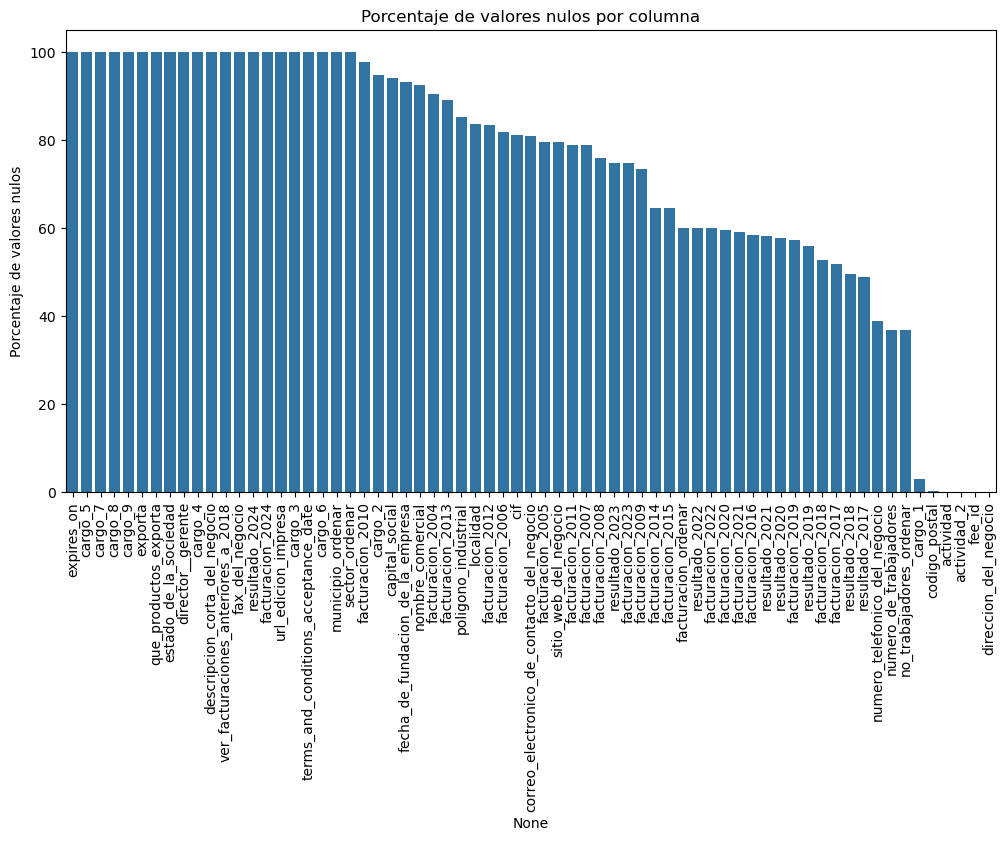

In [7]:
# Ordenar las columnas por porcentaje de valores nulos
missing_percentage_sorted = missing_percentage[missing_percentage > 0].sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=missing_percentage_sorted.index, y=missing_percentage_sorted.values)
plt.xticks(rotation=90)
plt.ylabel("Porcentaje de valores nulos")
plt.title("Porcentaje de valores nulos por columna")
plt.show()


In [3]:
# Mostrar todos los nombres de las columnas para verificar
print(df.columns.tolist())

df.columns = df.columns.str.strip()  # Elimina espacios extra en nombres de columnas

# Ahora accedemos de nuevo
print(df["correo_electronico_de_contacto_del_negocio"].notna().sum())



['sequence_id ', 'razon_social                                                                                        ', 'nombre_comercial                                                                     ', 'sector                                           ', 'actividad_2                                                                                                                                                                                                                                                                                                             ', 'actividad                                                                                                                                                                                                                                                                                                               ', 'cif            ', 'direccion_del_negocio                                                                

# Correos electronicos vacíos.

In [4]:
# Ver cuántos valores únicos hay realmente en la columna de correo
num_correos_unicos = df["correo_electronico_de_contacto_del_negocio"].nunique()
num_correos_totales = df["correo_electronico_de_contacto_del_negocio"].notna().sum()

print(f"Total de correos electrónicos NO vacíos: {num_correos_totales}")
print(f"Correos electrónicos ÚNICOS: {num_correos_unicos}")

# Verificar si hay correos duplicados
correos_duplicados = df["correo_electronico_de_contacto_del_negocio"].duplicated().sum()
print(f"Correos electrónicos duplicados: {correos_duplicados}")


Total de correos electrónicos NO vacíos: 2247
Correos electrónicos ÚNICOS: 2211
Correos electrónicos duplicados: 9615


# Porcentaje de nulos 

In [9]:
import pandas as pd

# Calcular valores nulos y porcentaje
missing_values = df.isna().sum()
missing_percentage = (missing_values / len(df)) * 100

# Crear DataFrame con la información
missing_data = pd.DataFrame({"Valores Faltantes": missing_values, "Porcentaje (%)": missing_percentage})
missing_data = missing_data[missing_data["Valores Faltantes"] > 0]  # Filtrar solo columnas con nulos

# Mostrar la tabla ordenada por porcentaje de nulos
print(missing_data.sort_values(by="Porcentaje (%)", ascending=False))


                       Valores Faltantes  Porcentaje (%)
expires_on                         11827      100.000000
cargo_5                            11827      100.000000
cargo_7                            11827      100.000000
cargo_8                            11827      100.000000
cargo_9                            11827      100.000000
...                                  ...             ...
codigo_postal                         18        0.152194
actividad                             10        0.084552
actividad_2                           10        0.084552
fee_id                                 3        0.025366
direccion_del_negocio                  1        0.008455

[67 rows x 2 columns]
